<a href="https://colab.research.google.com/github/Jatin28sahu/EDA_Project_DA/blob/main/EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adaptability of students in online Education**

---



* Since COVID-19 hits the World, Most of the big institutions look forward to the
Online Education Activities.

* But in many countries, it took a significant amount of time to adapt this. This is the Data set of one of the developing countries, Bangladesh.

* In this dataset, we will analyse the relevant factors that correlate the most with online education and train dataset with the befitted model. This can help target the right factors and steps towards Modern education.

Importing necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing CSV file

In [4]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [5]:
# look the dataset
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
# Looking for no. of rows and column
df.shape

(1205, 14)

In [7]:
# cheaking datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
#cheaking missing value

df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

**Not any missing value**

In [9]:
#Describing the dataset

df.describe().T

#we transposed the dataframe for better view

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


<Axes: ylabel='Adaptivity Level'>

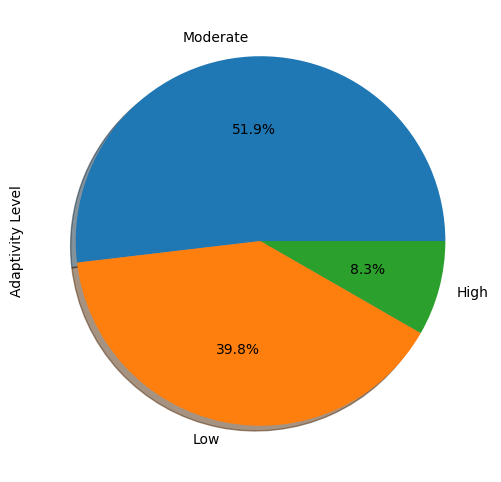

In [10]:
# Pie chart show % adaptivity level in dataset

plt.figure(figsize=(8,6))
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%' ,shadow=True)

The percentage Adaptivity Level in Dataset

 **Low = 39.8%**

 **Moderate = 51.9%**

 **High = 8.3 %**

<Axes: ylabel='Device'>

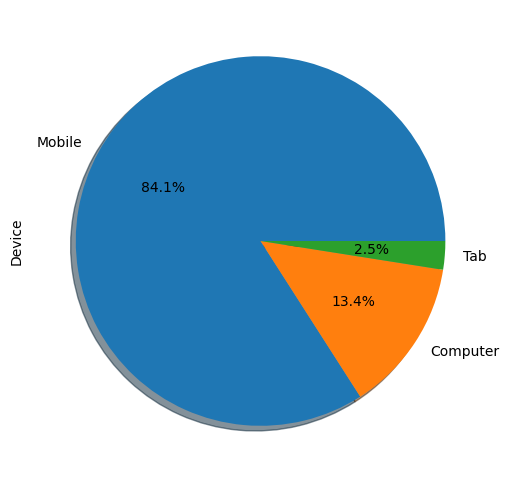

In [11]:
# Show the Device using in Dataset

plt.figure( figsize=(8,6))

df['Device'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

The Device using in Dataset

 **Mobile = 84.1%**

**Computer = 13.4%**

 **Tab = 2.5%**

<Axes: xlabel='Institution Type', ylabel='count'>

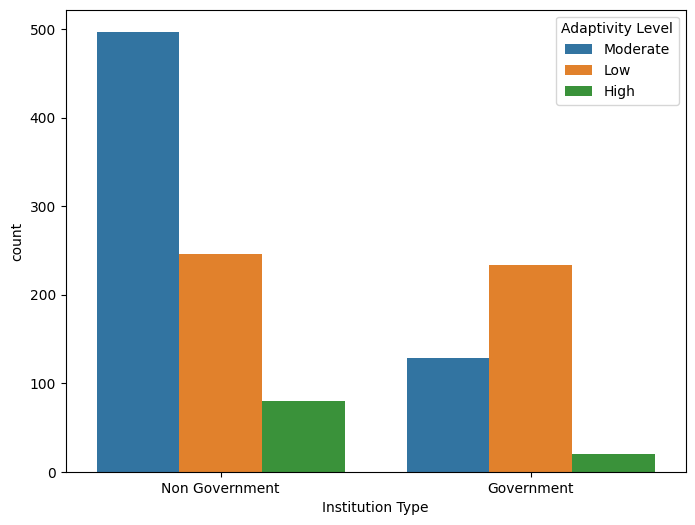

In [16]:
# Show the effect Institution Type in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))



sns.countplot(x=df["Institution Type"],hue=df["Adaptivity Level"])

#### In general we can say that,
**Affect on non Government - HIGH**

**Affect on Government - LOW**

<Axes: xlabel='Financial Condition', ylabel='count'>

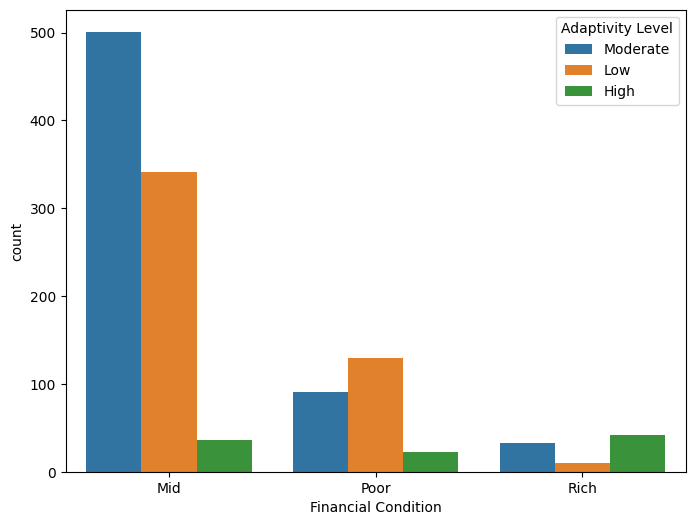

In [17]:
#Show the effect Financial Condition in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))

sns.countplot(x=df["Financial Condition"],hue=df["Adaptivity Level"])

#### According to this data,

**Middle Financial families Adaptivity - HIGH**

**Poor and Rich Financial families Adaptivity - LOW**

<Axes: xlabel='Gender', ylabel='count'>

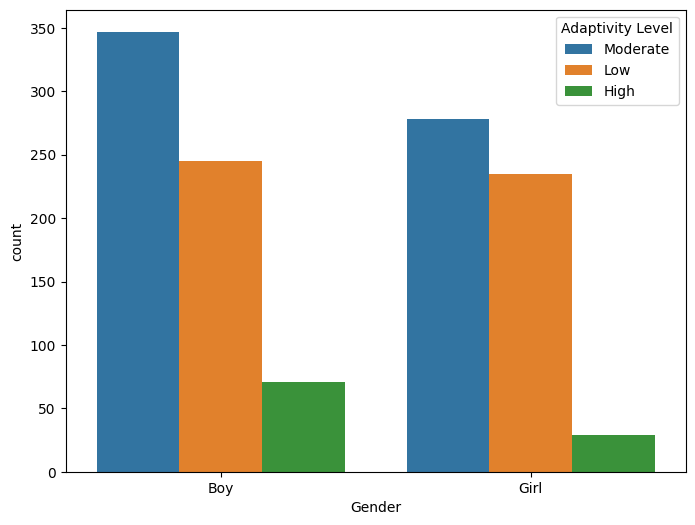

In [18]:
# Show the effect Gender in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))

sns.countplot(x=df["Gender"],hue=df["Adaptivity Level"])

**Not remarkable difference between the gender for Adaptivity Level**



<Axes: xlabel='Network Type', ylabel='count'>

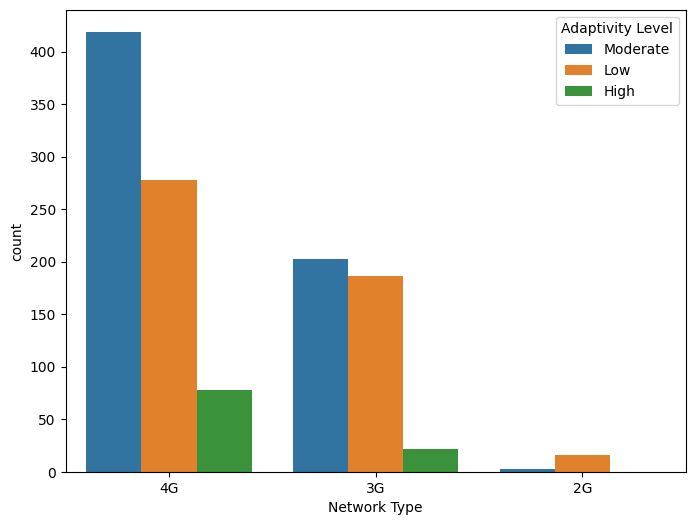

In [19]:
# Show the effect Network Type in Adaptivity Level using in Dataset

plt.figure(figsize=(8,6))
sns.countplot(x=df["Network Type"],hue=df["Adaptivity Level"])

Most of the students using - 4G and its progress **Highest**

Than 3G and 2G is  **lowest**

**Building a Machine Learning Model And Predict**

In [20]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**We need change all data type using LabelEncode**

In [22]:
# change all data type using LabelEncode

data=df

label_encoders = {}
categorical_columns = data.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [23]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [24]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Adaptivity Level")
y = df["Adaptivity Level"]   # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (843, 13)
X Test  :  (362, 13)
Y Train :  (843,)
Y Test  :  (362,)


In [25]:
#Train the machine learning algorithm

RFR = RandomForestClassifier()
RFR.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
#Make predictions
y_pred = RFR.predict(X_test)

#Evaluate the accuracy
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8922651933701657


**So our RandomForestClassifier Model has 89.23% Accuracy**

**DATA ANALYSIS**

* **The percentage Adaptivity Level in Dataset**

 Low = 39.8%

 Moderate = **51.9%**

 High = 8.3 %

* **The percentage Gender in Dataset**

 Boy= 55%

 Girl = 45 %

* **The Device using in Dataset**

 Mobile = **84.1%**

 Computer = 13.4%

 Tab = 2.5%

* Affect on non Government is **HIGH**
than Government institution.

* Financial Condition in families have middle financial have **highest percentage Adaptivity Level** then poor families and the rich families have less Adaptivity Level

* Not any differences between the **gender** for Adaptivity Level

* most the student using 4G , and the Network 4G have the **highest progress**